<a href="https://colab.research.google.com/github/khushii812-2/Data-Science-Handouts-/blob/main/3.%20Protein1A80%20structure%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Property-1A80
#PDB ID-1A8O
#Protein Name-Human Hemoglobin (Deoxy form)
#Organism-Homo sapiens (Human)
#Method-X-ray crystallography
#Resolution-2.1 Å
#Chains-A, B, C, D (tetrameric)
#Function-Oxygen transport in the blood
#Ligand-No oxygen or CO₂ bound in this form (deoxy)

In [ ]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 30.8 MB/s eta 0:00:00


In [ ]:
from Bio.PDB import PDBList
pdbl = PDBList()
pdbl.retrieve_pdb_file('1A8O', file_format='pdb')

Structure exists: '/content/a8/pdb1a8o.ent' 


'/content/a8/pdb1a8o.ent'

In [ ]:
from Bio.PDB import PDBParser

parser = PDBParser()
structure = parser.get_structure("1A8O", "/content/a8/pdb1a8o.ent")

for model in structure:
    for chain in model:
        print(" Chain ID:", chain.id)
        for residue in chain:
            print("Residue:", residue.resname, "Residue ID:", residue.id)

 Chain ID: A
Residue: MSE Residue ID: ('H_MSE', 151, ' ')
Residue: ASP Residue ID: (' ', 152, ' ')
Residue: ILE Residue ID: (' ', 153, ' ')
Residue: ARG Residue ID: (' ', 154, ' ')
Residue: GLN Residue ID: (' ', 155, ' ')
Residue: GLY Residue ID: (' ', 156, ' ')
Residue: PRO Residue ID: (' ', 157, ' ')
Residue: LYS Residue ID: (' ', 158, ' ')
Residue: GLU Residue ID: (' ', 159, ' ')
Residue: PRO Residue ID: (' ', 160, ' ')
Residue: PHE Residue ID: (' ', 161, ' ')
Residue: ARG Residue ID: (' ', 162, ' ')
Residue: ASP Residue ID: (' ', 163, ' ')
Residue: TYR Residue ID: (' ', 164, ' ')
Residue: VAL Residue ID: (' ', 165, ' ')
Residue: ASP Residue ID: (' ', 166, ' ')
Residue: ARG Residue ID: (' ', 167, ' ')
Residue: PHE Residue ID: (' ', 168, ' ')
Residue: TYR Residue ID: (' ', 169, ' ')
Residue: LYS Residue ID: (' ', 170, ' ')
Residue: THR Residue ID: (' ', 171, ' ')
Residue: LEU Residue ID: (' ', 172, ' ')
Residue: ARG Residue ID: (' ', 173, ' ')
Residue: ALA Residue ID: (' ', 174, ' ')

In [ ]:
from Bio.PDB import PDBParser
import numpy as np

parser = PDBParser(QUIET=True)
structure = parser.get_structure("1A8O", "/content/a8/pdb1a8o.ent")

alpha_carbons = []
residues = []

for model in structure:
    for chain in model:
        if chain.id == 'A':
            for residue in chain:
                if 'CA' in residue:
                    alpha_carbons.append(residue['CA'].get_coord())
                    residues.append(residue)

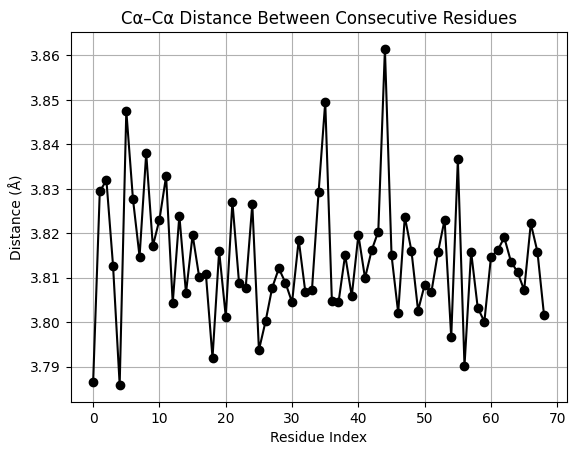

In [ ]:
import matplotlib.pyplot as plt

distances = []
for i in range(len(alpha_carbons) - 1):
    d = np.linalg.norm(alpha_carbons[i] - alpha_carbons[i + 1])
    distances.append(d)

plt.plot(distances, marker='o', color='black')
plt.title("Cα–Cα Distance Between Consecutive Residues")
plt.xlabel("Residue Index")
plt.ylabel("Distance (Å)")
plt.grid(True)
plt.show()


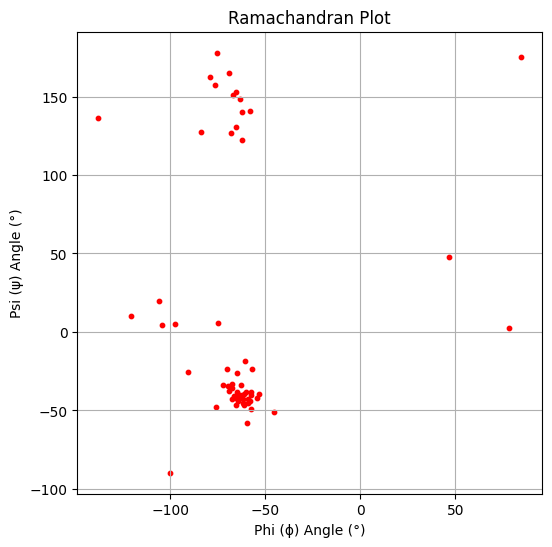

In [ ]:
from Bio.PDB.Polypeptide import PPBuilder
from Bio.PDB.vectors import calc_dihedral
import math

phi_psi = []

for model in structure:
    for chain in model:
        polypeptides = PPBuilder().build_peptides(chain)
        for poly in polypeptides:
            phi_psi_angles = poly.get_phi_psi_list()
            for phi, psi in phi_psi_angles:
                if phi and psi:
                    phi_psi.append((math.degrees(phi), math.degrees(psi)))

phis, psis = zip(*phi_psi)
plt.figure(figsize=(6, 6))
plt.scatter(phis, psis, c='red', s=10)
plt.title("Ramachandran Plot")
plt.xlabel("Phi (ϕ) Angle (°)")
plt.ylabel("Psi (ψ) Angle (°)")
plt.grid(True)
plt.show()


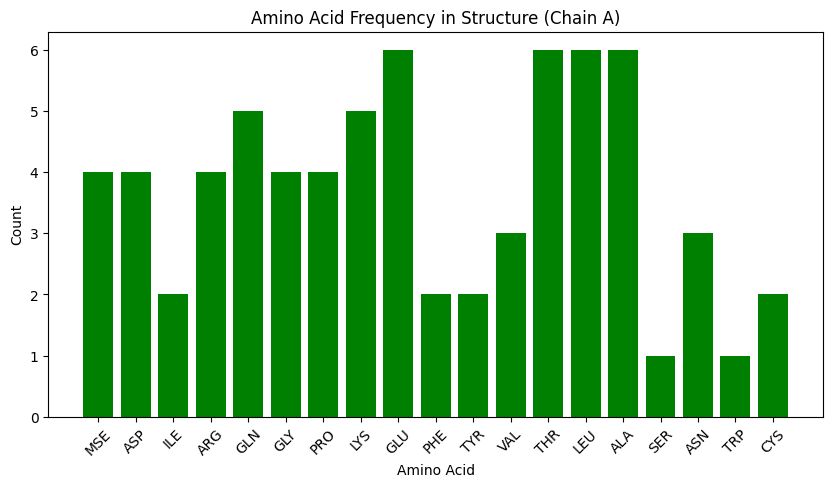

In [ ]:
from collections import Counter

aa_list = [residue.resname for residue in residues]
aa_count = Counter(aa_list)

plt.figure(figsize=(10, 5))
plt.bar(aa_count.keys(), aa_count.values(), color='green')
plt.title("Amino Acid Frequency in Structure (Chain A)")
plt.xlabel("Amino Acid")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(False)
plt.show()


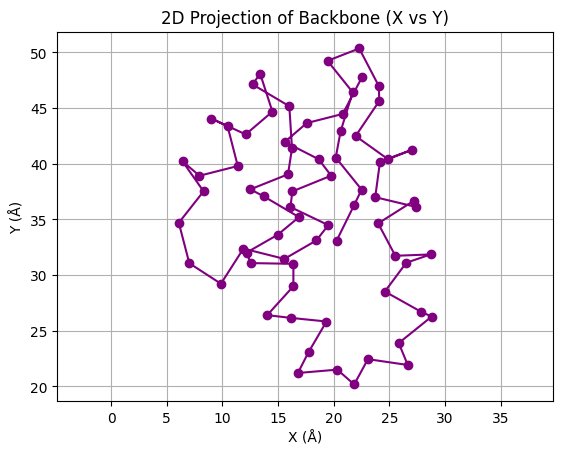

In [ ]:
alpha_carbons_xy = [coord[:2] for coord in alpha_carbons]

x_vals = [coord[0] for coord in alpha_carbons_xy]
y_vals = [coord[1] for coord in alpha_carbons_xy]

plt.plot(x_vals, y_vals, marker='o', color='purple')
plt.title("2D Projection of Backbone (X vs Y)")
plt.xlabel("X (Å)")
plt.ylabel("Y (Å)")
plt.axis('equal')
plt.grid(True)
plt.show()


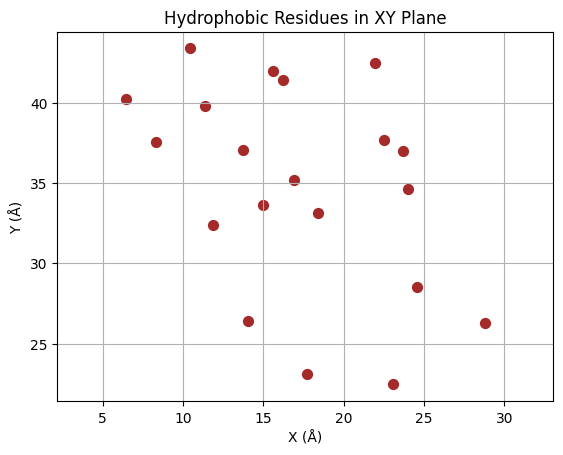

In [ ]:
hydrophobic = {'ALA', 'VAL', 'ILE', 'LEU', 'MET', 'PHE', 'TRP'}

x_hydro = []
y_hydro = []

for residue, ca in zip(residues, alpha_carbons):
    if residue.resname in hydrophobic:
        x_hydro.append(ca[0])
        y_hydro.append(ca[1])

plt.scatter(x_hydro, y_hydro, c='brown', s=50)
plt.title("Hydrophobic Residues in XY Plane")
plt.xlabel("X (Å)")
plt.ylabel("Y (Å)")
plt.axis('equal')
plt.grid(True)
plt.show()


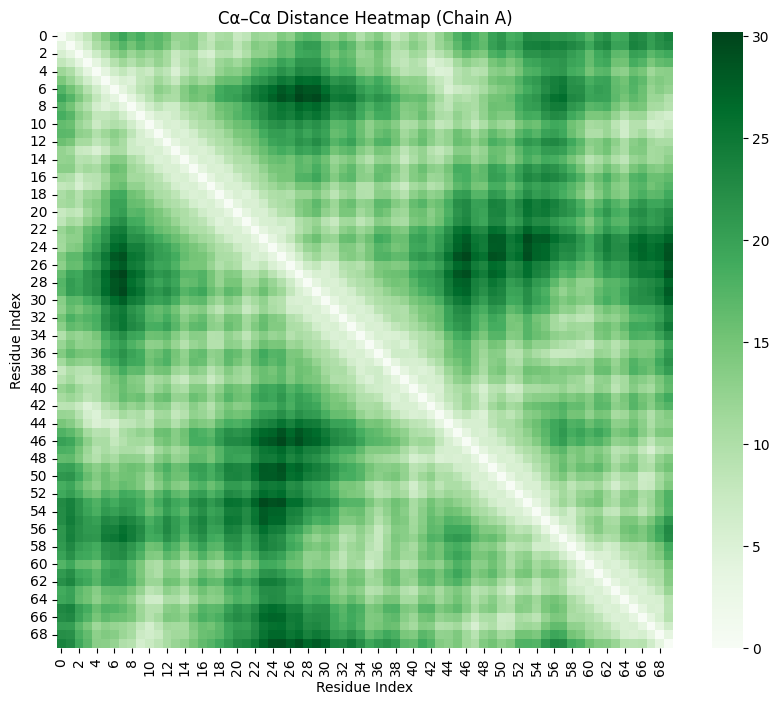

In [ ]:
import seaborn as sns
import numpy as np # Import numpy if not already imported
import matplotlib.pyplot as plt # Import matplotlib if not already imported

n = len(alpha_carbons)
distance_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        distance_matrix[i][j] = np.linalg.norm(alpha_carbons[i] - alpha_carbons[j])

plt.figure(figsize=(10, 8))
sns.heatmap(distance_matrix, cmap="Greens", square=True) # Changed 'green' to 'Greens'
plt.title("Cα–Cα Distance Heatmap (Chain A)")
plt.xlabel("Residue Index")
plt.ylabel("Residue Index")
plt.show()

In [ ]:
!pip install py3Dmol

In [ ]:
import py3Dmol

def show_pdb_3d(pdb_id="1A8O", style="cartoon"):
    view = py3Dmol.view(query='pdb:' + pdb_id)
    view.setStyle({style: {}})
    view.setBackgroundColor('white')
    view.zoomTo()
    return view.show()

show_pdb_3d("1A8O")

3Dmol.js failed to load for some reason. Please check your browser console for error messages.